<a href="https://colab.research.google.com/github/Preetraj2002/Handwashing_Analysis/blob/main/Dr_Semmelweis_Handwashing_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).


### The Data Source

Dr Semmelweis published his research in 1861. (http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).


In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [5]:
df_yearly = pd.read_csv('https://raw.githubusercontent.com/Preetraj2002/Handwashing_Analysis/main/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('https://raw.githubusercontent.com/Preetraj2002/Handwashing_Analysis/main/monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [6]:
print(df_yearly.shape)
print(df_monthly.shape)
print(df_yearly.columns)
print(df_monthly.columns)

(12, 4)
(98, 3)
Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Index(['date', 'births', 'deaths'], dtype='object')


In [7]:
df_yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [8]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [9]:
df_yearly.value_counts()

year  births  deaths  clinic  
1841  2442    86      clinic 2    1
      3036    237     clinic 1    1
1842  2659    202     clinic 2    1
      3287    518     clinic 1    1
1843  2739    164     clinic 2    1
      3060    274     clinic 1    1
1844  2956    68      clinic 2    1
      3157    260     clinic 1    1
1845  3241    66      clinic 2    1
      3492    241     clinic 1    1
1846  3754    105     clinic 2    1
      4010    459     clinic 1    1
dtype: int64

### Check for Nan Values and Duplicates

In [10]:
print(df_yearly.isna().values.any())
print(df_monthly.isna().values.any())

False
False


In [11]:
print(df_yearly.duplicated().values.any())
print(df_monthly.duplicated().values.any())

False
False


### Descriptive Statistics

In [12]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [13]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [14]:
death_rate=df_yearly.deaths.sum()/df_yearly.births.sum()
death_rate*100


7.083762852536147

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with two y-axes.


In [15]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

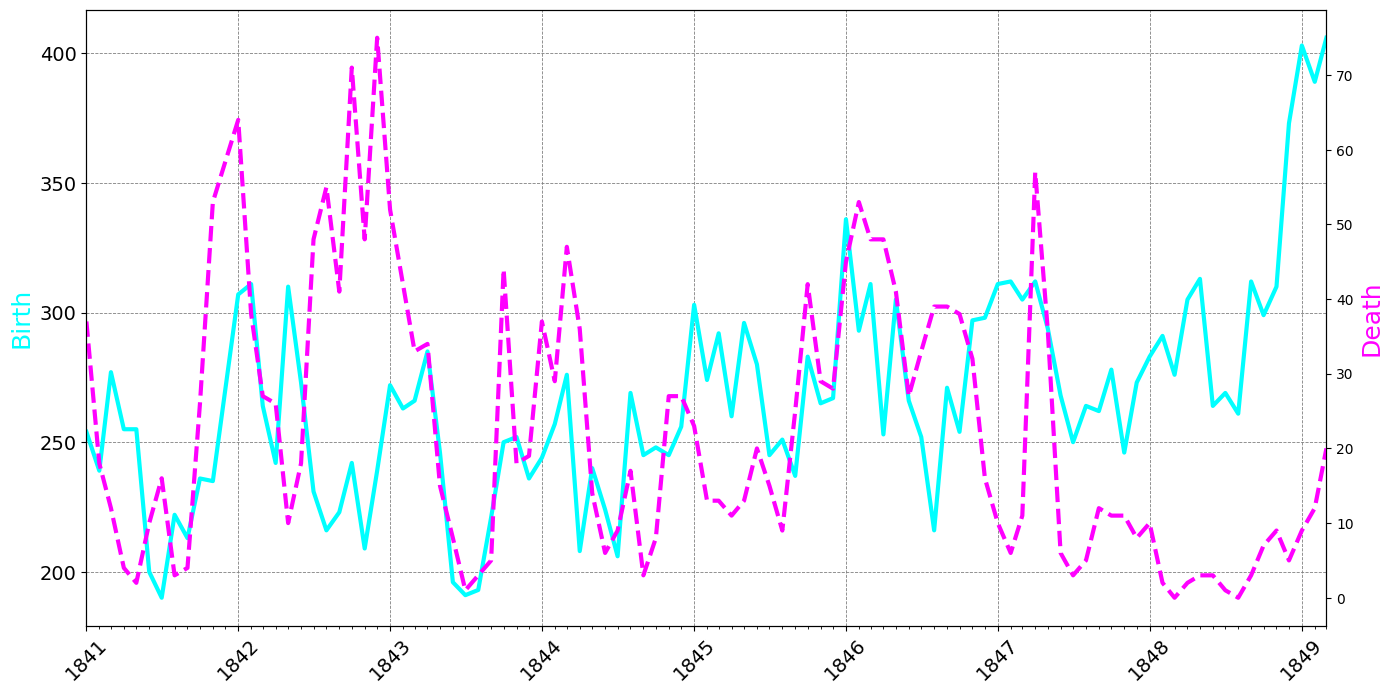

In [16]:
plt.figure(figsize=(16,8))
plt.title="Total No. of Monthly Births and Deaths"
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.grid(which='major', linewidth=0.6,linestyle='--',color='grey')

ax1 = plt.gca()
ax2 = plt.twinx(ax1)

ax1.set_ylabel('Birth',fontsize=18,color='aqua')
ax2.set_ylabel("Death",fontsize=18,color='magenta')


ax1.plot(df_monthly.date,
         df_monthly.births,
         color='aqua',
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='magenta',
         linestyle='dashed',
         linewidth=3)

ax1.set_xlim([df_monthly.date.min(),df_monthly.date.max()])

#format the tick
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [17]:
df_yearly.loc[df_yearly.clinic=='clinic 1']

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1


In [18]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title="Total Yearly Births by Clinic")

line.show()

In [19]:
line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title="Total Yearly Deaths by Clinic")

line.show()

In [20]:
df_yearly.groupby('clinic').agg({'births':'sum','deaths':'sum'})

,births,deaths
clinic,,
clinic 1,20042,1989
clinic 2,17791,691


### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [21]:
df_yearly['pct_deaths']=df_yearly['deaths']/df_yearly['births']
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


In [22]:
birth1 = df_yearly.loc[df_yearly.clinic =='clinic 1']['births'].sum()
death1 = df_yearly.loc[df_yearly.clinic =='clinic 1']['deaths'].sum()
birth2 = df_yearly.loc[df_yearly.clinic =='clinic 2']['births'].sum()
death2 = df_yearly.loc[df_yearly.clinic =='clinic 2']['deaths'].sum()
rate1=death1/birth1
rate2=death2/birth2
print("Clinic 1 death rate =",(rate1*100))
print("Clinic 2 death rate =",(rate2*100))

Clinic 1 death rate = 9.924159265542361
Clinic 2 death rate = 3.8839862852003826


### Plotting the Proportion of Yearly Deaths by Clinic

In [23]:
line = px.line(df_yearly,
               x='year',
               y='pct_deaths',
               color = 'clinic',
               title = "Total % Deaths in Different Clinics",
               hover_name='deaths'
               )

line.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [24]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**:
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [25]:
df_monthly['pct_deaths']=df_monthly['deaths']/df_monthly['births']
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
93,1848-11-01,310,9,0.03
94,1848-12-01,373,5,0.01
95,1849-01-01,403,9,0.02
96,1849-02-01,389,12,0.03


In [26]:
before=df_monthly[df_monthly.date < handwashing_start]
after =df_monthly[df_monthly.date >= handwashing_start]
after.head(10)

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,0.02
77,1847-07-01,250,3,0.01
78,1847-08-01,264,5,0.02
79,1847-09-01,262,12,0.05
80,1847-10-01,278,11,0.04
81,1847-11-01,246,11,0.04
82,1847-12-01,273,8,0.03
83,1848-01-01,283,10,0.04
84,1848-02-01,291,2,0.01
85,1848-03-01,276,0,0.00


In [27]:
death_before=before.deaths.sum()/before.births.sum()
death_after=after.deaths.sum()/before.births.sum()

print("Death % before handwashing = ",death_before*100,'%')
print("Death % after handwashing = ",death_after*100,'%')

Death % before handwashing =  10.52577793674314 %
Death % after handwashing =  0.7255633335036533 %


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [28]:
df_roll = before.set_index('date')['pct_deaths'].rolling(window=6).mean()
df_roll.head(10)

date
1841-01-01    NaN
1841-02-01    NaN
1841-03-01    NaN
1841-04-01    NaN
1841-05-01    NaN
1841-06-01   0.06
1841-07-01   0.05
1841-08-01   0.04
1841-09-01   0.03
1841-10-01   0.05
Name: pct_deaths, dtype: float64

### Highlighting Subsections of a Line Chart


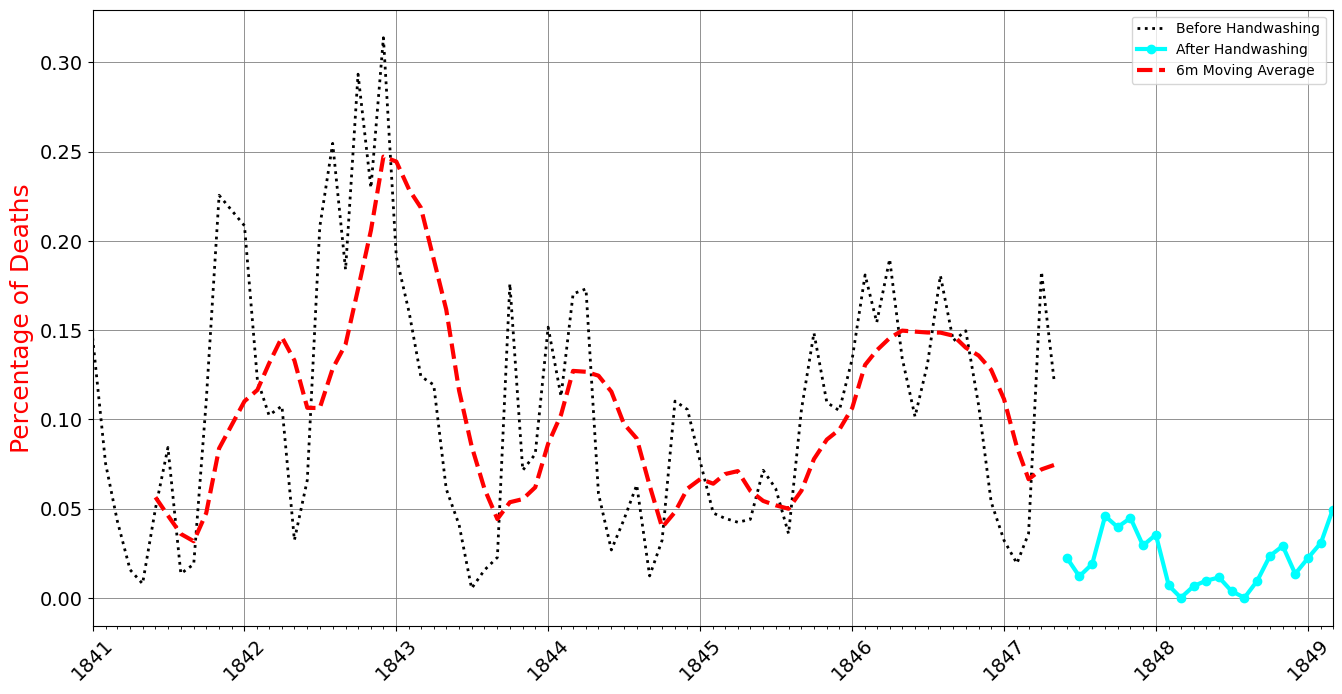

In [29]:
plt.figure(figsize=(16,8))
plt.title="Total % of Deaths"
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.grid(which='major', linewidth=0.6,color='grey')

ax1 = plt.gca()


ax1.set_ylabel('Percentage of Deaths',fontsize=18,color='red')



ax1.plot(before.date,
         before.pct_deaths,
         color='black',
         linewidth=2,
         linestyle=':',
         label='Before Handwashing')

ax1.plot(after.date,
         after.pct_deaths,
         color='aqua',
         marker='o',
         linewidth=3,
         label='After Handwashing')

ax1.plot(df_roll.index,
         df_roll.values,
         color='red',
         linestyle='--',
         linewidth=3,
         label='6m Moving Average')

ax1.set_xlim([df_monthly.date.min(),df_monthly.date.max()])

#format the tick
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.legend()

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [30]:
before_avg = before['pct_deaths'].mean()*100
print(f"Before Avg. = {before_avg:.3}%")
after_avg = after['pct_deaths'].mean()*100
print(f"After Avg. = {after_avg:.3}%")
diff_avg=before_avg-after_avg
print(f"Diff. Avg = {diff_avg:.3}%")

times = before_avg/after_avg
print(f"Times {times:.2}")


Before Avg. = 10.5%
After Avg. = 2.11%
Diff. Avg = 8.4%
Times 5.0


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**:
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [31]:
df_monthly['handwashing_start'] = np.where(df_monthly.date > handwashing_start,
                                           'yes',      # run when condition true
                                           'no')     # run when condition false

df_monthly.head()

,date,births,deaths,pct_deaths,handwashing_start
0,1841-01-01,254,37,0.15,no
1,1841-02-01,239,18,0.08,no
2,1841-03-01,277,12,0.04,no
3,1841-04-01,255,4,0.02,no
4,1841-05-01,255,2,0.01,no


In [32]:
df_monthly.tail()

,date,births,deaths,pct_deaths,handwashing_start
93,1848-11-01,310,9,0.03,yes
94,1848-12-01,373,5,0.01,yes
95,1849-01-01,403,9,0.02,yes
96,1849-02-01,389,12,0.03,yes
97,1849-03-01,406,20,0.05,yes


In [33]:
before.describe()

,births,deaths,pct_deaths
count,76.00,76.00,76.00
mean,257.51,27.11,0.11
std,34.28,17.94,0.07
min,190.00,1.00,0.01
25%,236.75,11.75,0.04
50%,254.50,26.50,0.11
75%,280.75,39.50,0.15
max,336.00,75.00,0.31


In [34]:
after.describe()

,births,deaths,pct_deaths
count,22.00,22.00,22.00
mean,299.77,6.45,0.02
std,49.11,4.97,0.02
min,246.00,0.00,0.00
25%,265.00,3.00,0.01
50%,280.50,5.50,0.02
75%,311.50,9.75,0.03
max,406.00,20.00,0.05


In [35]:
box = px.box(df_monthly,
             x='handwashing_start',
             y='pct_deaths',
             color='handwashing_start',
             title="Stats changed with Handwashing",
             points='all')

box.update_layout(xaxis_title='washing Hands ?')

box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [36]:
hist = px.histogram(df_monthly,
                   x='pct_deaths',
                    color="handwashing_start",
                    barmode='overlay',
                    histnorm='percent',
                    nbins=30,
                    marginal='box'
                    )

hist.update_layout(xaxis_title="Proportion of Monthly Deaths",
                   yaxis_title="Death Count")

hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


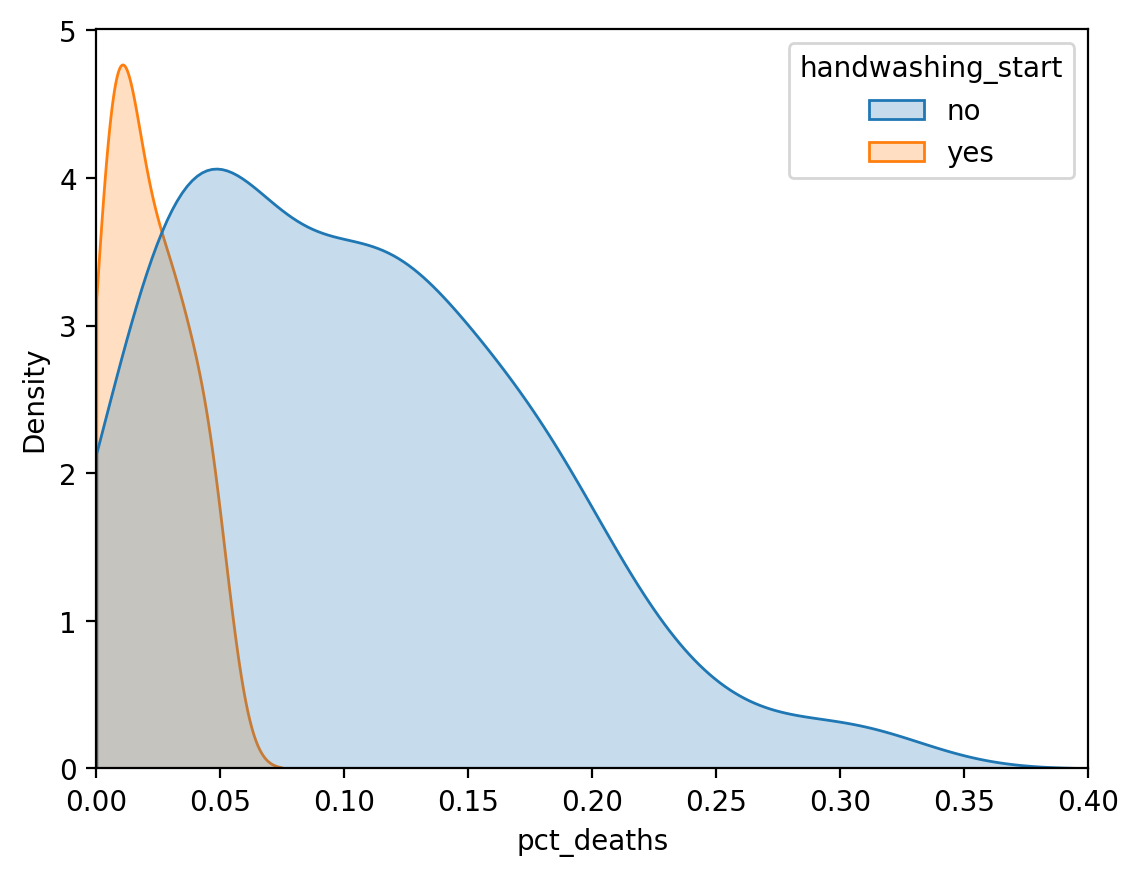

In [49]:
plt.figure(dpi=200)
plt.title="Distribution of Monthly Death Rate Before and After Handwashing"

sns.kdeplot(df_monthly,
                  x='pct_deaths',
                  hue='handwashing_start',
                  clip=(0,1),
                  fill=True)
plt.xlim(0,0.4)

plt.show()




### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.


In [64]:
t_stat,p_value=stats.ttest_ind(before.pct_deaths,after.pct_deaths)
print(f"The P-value for t-test = {p_value:.10f}")
# The value is far below even 1%. So its highly statistically significant
print(f"T-statistic = {t_stat:.4}")


The P-value for t-test = 0.0000002985
T-statistic = 5.512
